# Lab work 1 : Machine Learning Basics

This notebook builds on the first lecture of Foundations of Machine Learning. We'll focus on the preprocessing pipeline, the actual models will come later, but for now, you'll see how each step gets us closer to a proper model.

Important note: the steps shown here are not always the most efficient or the most “industry-approved.” Their main purpose is pedagogical. So don't panic if something looks suboptimal—it's meant to be.

If you have questions (theoretical or practical), don't hesitate to bug your lecturer.

We will try to accurately predict the price of a diamond based on a [dataset](<(https://www.kaggle.com/datasets/shivam2503/diamonds)>). Let's first load the dataset.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    root_mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    f1_score,
)
from sklearn.linear_model import LinearRegression

# np.random.seed(0)
print("Ready.")

Ready.


In [ ]:
df = pd.read_csv("NB1 - Diamonds.csv")
df.head()
# number of rows
# len(df)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Before diving into the dataset, notice that the column _Unnamed: 0_ doesn't seem to carry any useful information.

**Task** : Use the [`drop`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) method to remove the _Unnamed: 0_ column.


In [ ]:
dropped_df = df.drop(["Unnamed: 0"], axis=1)
dropped_df.head()

# len(dropped_df)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Here are the columns we'll be working with:

- **price** : price in US dollars ($326-$18,823)
- **carat** : weight of the diamond (0.2-5.01)
- **cut** : quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- **color** : diamond colour, from J (worst) to D (best)
- **clarity** : a measurement of how clear the diamond is from I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, to IF (best)
- **x** : length in mm (0-10.74)
- **y** : width in mm (0-58.9)
- **z** : depth in mm (0-31.8)
- **depth** : total depth percentage = z / mean(x, y) = 2 \* z / (x + y) (43-79)
- **table** : width of top of diamond relative to widest point (43-95)

We're all eager to jump into machine learning, so let's build our very first linear regressor!

## My first model !

We know that a linear regression only works with numerical inputs. So, in this case, we can use the columns _carat_, _x_, _y_, _z_, _depth_ and _table_ to predict the target column _price_.

**Task** : From the dataframe _df_, extract a matrice _X_ (the features) and a vector _y_ (the target). Then use [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split _X_ and _y_ into training and test sets.


In [ ]:
X = dropped_df[["x", "y", "z", "carat", "depth", "table"]]
y = dropped_df["price"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=0
)
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 32364
Validation set size: 10788
Test set size: 10788


Now that we have our training and test sets, it's time to train and evaluate! We'll measure performance with two metrics: [`RMSE`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html#sklearn.metrics.root_mean_squared_error) and [`MAE`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error).

**Task** : Using the [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class, fit a model on the training set. Then use the `predict` method to make predictions on the test set and print out performance for both metrics.


In [7]:
linear_regression_model = LinearRegression().fit(X_train, y_train)
y_pred = linear_regression_model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 1499.5756721929824
MAE: 880.520190007727


model is not good at outliers. that shows because you mean absolute error is low, meaning that the model is good often but when it is wrong it is very wrong.


In [8]:
from sklearn.metrics import r2_score

In [9]:
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.8545626969574602


So... is our model actually any good?

**Task** : Interpret the results you just got, and then compute the performance of a very simple baseline model for comparison.


In [10]:
y_test.mean()

np.float64(3896.684278828328)

It could definitely be better. Let's take a step back and reflect:

1. We chose columns just based on their type. That means we ignored categorical data and didn't even check whether the values made sense.
2. We trained the model once and didn't checked for overfitting.

Maybe we rushed things a bit. Time to get back to the bread and butter of data science: data preparation.

## Data quality

**Task** : Use the [`isna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) method together with `sum` to check for missing values in the dataset and interpret.


In [11]:
missing_value_count = dropped_df.isna().sum()
print(missing_value_count)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


all the data seems fine


**Task** : Use the [`describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) method to examine the distributions of the numerical variables, and then interpret the results.


In [12]:
dropped_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The minimum values for _x_, _y_, and _z_ are 0. So apparently... we have some 2D diamonds ?!

**Task**: Display all observations where at least one of the three dimension variables is equal to 0.


In [ ]:
twod_diamonds = dropped_df[
    (dropped_df["x"] == 0) | (dropped_df["y"] == 0) | (dropped_df["z"] == 0)
]
len(twod_diamonds)

20

Clearly, these _flat diamonds_ make no sense for our study, they're just data collection errors.

**Task**: Remove these observations, and report the dataset size before and after the cleanup.


In [ ]:
clean_df = dropped_df[
    (dropped_df["x"] != 0) & (dropped_df["y"] != 0) & (dropped_df["z"] != 0)
]
len(clean_df)

53920

So far, we haven't really looked at any distributions. Let's explore the distribution of a column, say _carat_, and how it relates to the target.

**Task**: Build a function explore_column with the following parameters:

- _df_: the dataframe containing the columns of interest
- _column_: the name of the column you want to inspect
- _target_column_: the name of the target column

The function should display, side by side, a histogram of the column and a scatter plot showing its relationship with the target.


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def explore_column(df, column, target_column):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[column])
    plt.title(f"Distribution of {column}")

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=df[column], y=df[target_column])
    plt.title(f"{target_column} vs {column}")

    plt.show()

**Task** : Use the previous function on the _y_ column.


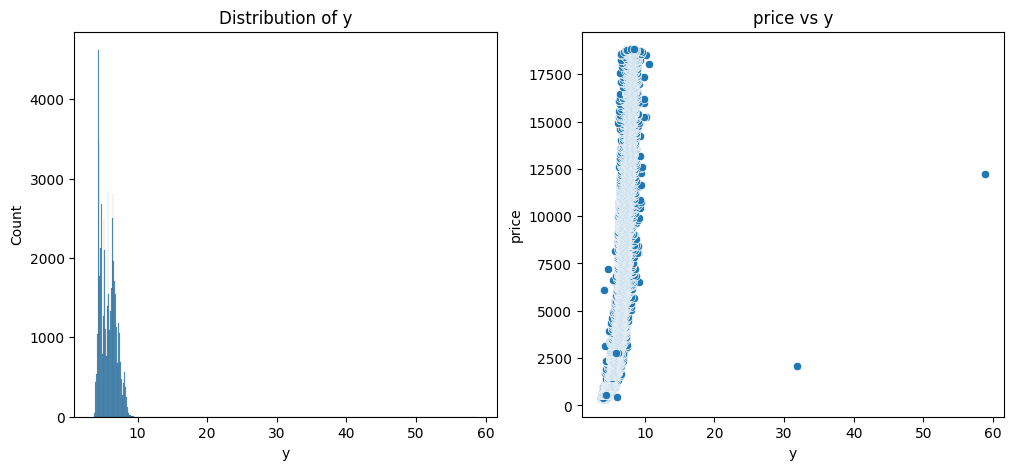

In [17]:
explore_column(clean_df, "y", "price")

Looks like we have some outliers! These two points could seriously mess with our predictions because they don't follow the trend. To make this clearer, here's a small toy example illustrating the effect.


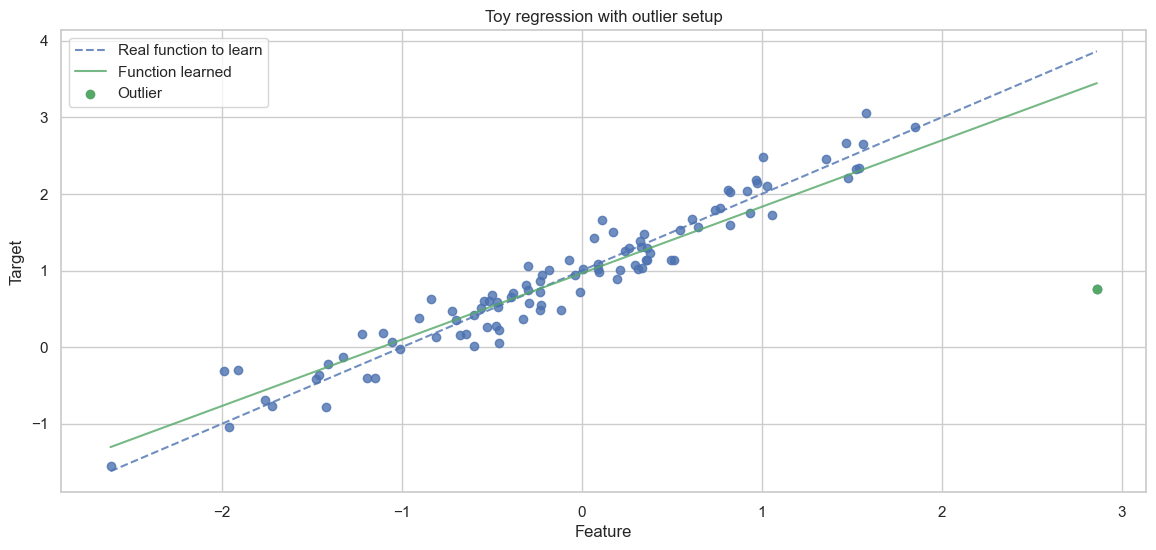

In [18]:
import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
%matplotlib inline

size = 100
sigma = 0.25
function_real = lambda x: x + 1

x = np.random.normal(size=size)
y = function_real(x) + sigma * np.random.normal(size=size)

offset = 3
random_index = np.random.randint(0, size)
x[random_index] = x[random_index] + offset

x_range = np.array([np.min(x), np.max(x)])

model = LinearRegression().fit(x.reshape(-1, 1), y)
function_learned = lambda x: model.coef_[0] * x + model.intercept_

plt.figure(figsize=(14, 6))
plt.plot(x_range, function_real(x_range), ls='--', alpha=0.8, color=sns.color_palette()[0], label="Real function to learn")
plt.plot(x_range, function_learned(x_range), alpha=0.8, color=sns.color_palette()[2], label="Function learned")
plt.scatter(x, y, alpha=0.8)
plt.scatter(x[random_index], y[random_index], color=sns.color_palette()[2], label="Outlier")

plt.title("Toy regression with outlier setup")
plt.ylabel("Target")
plt.xlabel("Feature")
plt.legend()
plt.show()

**Task** : Remove the outliers from the _y_ column, then explore the other columns as needed. Make sure to print the number of observations before and after the cleanup.


In [ ]:
len(clean_df)
removed_outliers_df = clean_df[clean_df["y"] < 20]

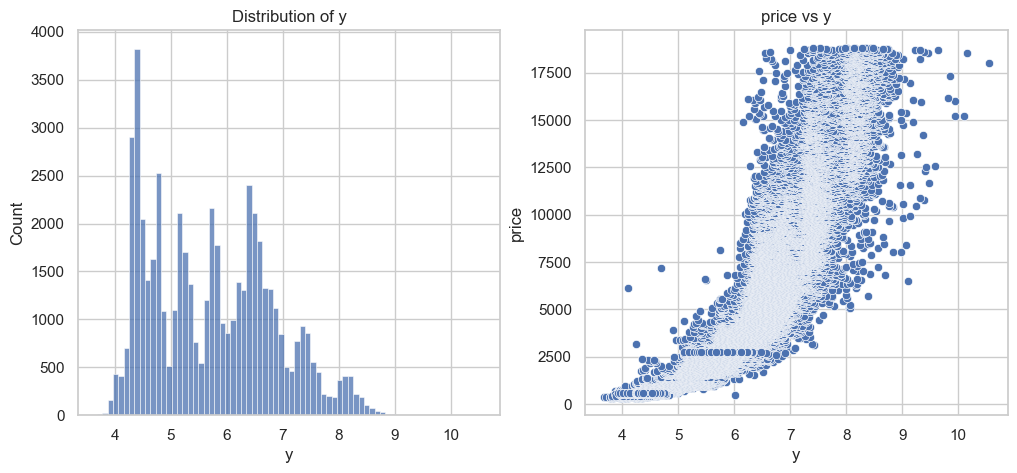

In [20]:
explore_column(removed_outliers_df, "y", "price")

For a deeper dive into outliers, one can see [here](https://github.com/theo-lq/ML-IF-STIN/tree/master/Bonus/Outliers).

Next, we need to handle the categorical variables. A good way to explore them is with a violin plot.


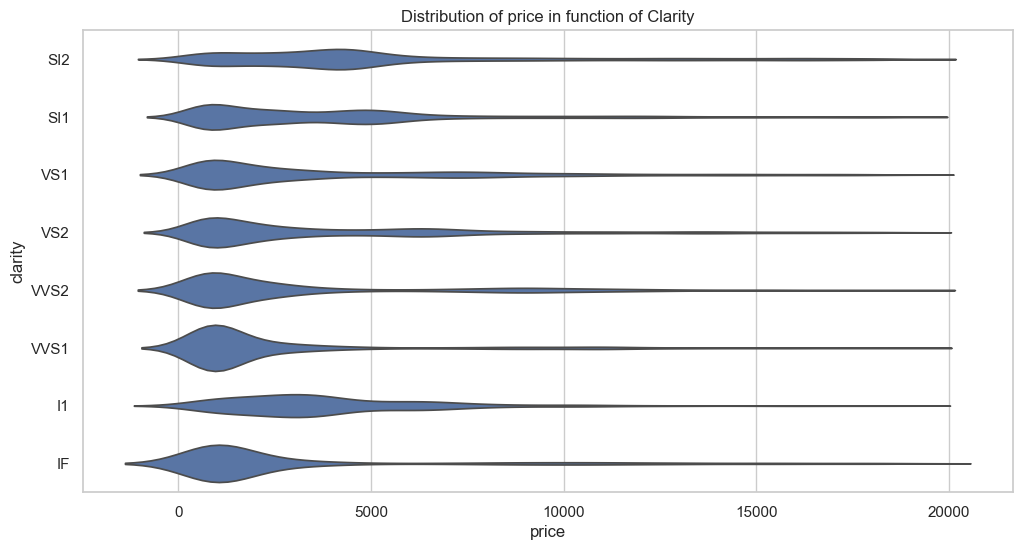

In [ ]:
def make_violin_plot(column, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    sns.violinplot(data=df, x="price", y=column, inner=None)
    plt.title("Distribution of price in function of %s" % column.capitalize())
    plt.show()


make_violin_plot("clarity")

After carefully exploring all the categorical variables, it's time to transform them into a format our model can use. One-Hot Encoding is a good choice here.

**Task** : Use the [`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) function to perform One-Hot-Encoding. Don't forget to check the number of columns before and after the transformation.


In [ ]:
one_hot_df = pd.get_dummies(removed_outliers_df, columns=["clarity"])

In [36]:
len(one_hot_df)
head = one_hot_df.head()
head

,carat,cut,color,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,E,61.5,55.0,326,3.95,3.98,2.43,False,False,False,True,False,False,False,False
1,0.21,Premium,E,59.8,61.0,326,3.89,3.84,2.31,False,False,True,False,False,False,False,False
2,0.23,Good,E,56.9,65.0,327,4.05,4.07,2.31,False,False,False,False,True,False,False,False
3,0.29,Premium,I,62.4,58.0,334,4.20,4.23,2.63,False,False,False,False,False,True,False,False
4,0.31,Good,J,63.3,58.0,335,4.34,4.35,2.75,False,False,False,True,False,False,False,False


In [ ]:
len(removed_outliers_df)
removed_outliers_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


How useful were all these preprocessing steps for our task? Let's find out by measuring performance again.

**Task**: Split the data into training and test sets, then train the model and evaluate its performance on the test set. Compare the results to your previous predictions and provide some commentary.


In [ ]:
X_clean = one_hot_df[
    [
        "x",
        "y",
        "z",
        "carat",
        "depth",
        "table",
        "clarity_I1",
        "clarity_IF",
        "clarity_SI1",
        "clarity_SI2",
        "clarity_VS1",
        "clarity_VS2",
        "clarity_VVS1",
        "clarity_VVS2",
    ]
]
y_clean = one_hot_df["price"]

X_train, X_temp, y_train, y_temp = train_test_split(
    X_clean, y_clean, test_size=0.4, random_state=0
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=0
)
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
linear_regression_model = LinearRegression().fit(X_train, y_train)
y_pred = linear_regression_model.predict(X_test)
rmse_clean = root_mean_squared_error(y_test, y_pred)
mae_clean = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse_clean}")
print(f"MAE: {mae_clean}")

Training set size: 32350
Validation set size: 10784
RMSE: 1244.3173636639572
MAE: 801.1322818404974


In [43]:
print("Improvement in RMSE:", rmse - rmse_clean)
print("Improvement in MAE:", mae - mae_clean)

Improvement in RMSE: 255.25830852902527
Improvement in MAE: 79.38790816722963


So far, we've only measured performance on the test set and didn't checked for overfitting.

**Task**: Is there overfitting here ?


In [47]:
# Check for overfitting by comparing training and test performance
y_train_pred = linear_regression_model.predict(X_train)
y_val_pred = linear_regression_model.predict(X_val)

# Calculate metrics for training set
rmse_train = root_mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate metrics for validation set
rmse_val = root_mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

print("Training Set Performance:")
print(f"RMSE: {rmse_train:.2f}")
print(f"MAE: {mae_train:.2f}")

print("\nValidation Set Performance:")
print(f"RMSE: {rmse_val:.2f}")
print(f"MAE: {mae_val:.2f}")

print("\nTest Set Performance:")
print(f"RMSE: {rmse_clean:.2f}")
print(f"MAE: {mae_clean:.2f}")

Training Set Performance:
RMSE: 1266.24
MAE: 803.43

Validation Set Performance:
RMSE: 1283.17
MAE: 811.66

Test Set Performance:
RMSE: 1244.32
MAE: 801.13


no it does not overfit because val and test loss are similiar as training loss, if it were to overfit it would be high on validation loss. but low on the test set


We want to understand how each part of our preprocessing affects prediction quality. To do this, we'll measure performance at each key step.

**Task**: Define a function named train_predict with the following parameters:

- _X_: feature matrix
- _y_: target vector
- _metric_: a performance metric

The function should generalize the code from the previous cell so it can be reused for different preprocessing steps.


In [ ]:
def train_predict(X, y, metric):
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.4, random_state=0
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=0
    )
    print(f"Training set size: {len(X_train)}")
    print(f"Validation set size: {len(X_val)}")
    linear_regression_model = LinearRegression().fit(X_train, y_train)
    y_pred = linear_regression_model.predict(X_test)
    if metric == "rmse":
        score = root_mean_squared_error(y_test, y_pred)
    elif metric == "mae":
        score = mean_absolute_error(y_test, y_pred)
    else:
        raise ValueError("Unsupported metric. Use 'rmse' or 'mae'.")
    return score

**Task** : Write a cell that measure performance at each key steps of the notebook.


In [ ]:
print("=" * 60)
print("Performance Comparison at Each Preprocessing Step")
print("=" * 60)

# Step 1: Baseline - Original data with only numerical features
X_baseline = dropped_df[["x", "y", "z", "carat", "depth", "table"]]
y_baseline = dropped_df["price"]
rmse_baseline = train_predict(X_baseline, y_baseline, "rmse")
mae_baseline = train_predict(X_baseline, y_baseline, "mae")
print(f"\n1. BASELINE (Original data, numerical only):")
print(f"   RMSE: {rmse_baseline:.2f}")
print(f"   MAE: {mae_baseline:.2f}")

# Step 2: After removing 2D diamonds (zero dimensions)
X_clean_2d = clean_df[["x", "y", "z", "carat", "depth", "table"]]
y_clean_2d = clean_df["price"]
rmse_clean_2d = train_predict(X_clean_2d, y_clean_2d, "rmse")
mae_clean_2d = train_predict(X_clean_2d, y_clean_2d, "mae")
print(f"\n2. AFTER REMOVING 2D DIAMONDS:")
print(
    f"   RMSE: {rmse_clean_2d:.2f} (Improvement: {rmse_baseline - rmse_clean_2d:.2f})"
)
print(f"   MAE: {mae_clean_2d:.2f} (Improvement: {mae_baseline - mae_clean_2d:.2f})")

# Step 3: After removing outliers
X_no_outliers = removed_outliers_df[["x", "y", "z", "carat", "depth", "table"]]
y_no_outliers = removed_outliers_df["price"]
rmse_no_outliers = train_predict(X_no_outliers, y_no_outliers, "rmse")
mae_no_outliers = train_predict(X_no_outliers, y_no_outliers, "mae")
print(f"\n3. AFTER REMOVING OUTLIERS:")
print(
    f"   RMSE: {rmse_no_outliers:.2f} (Improvement: {rmse_baseline - rmse_no_outliers:.2f})"
)
print(
    f"   MAE: {mae_no_outliers:.2f} (Improvement: {mae_baseline - mae_no_outliers:.2f})"
)

# Step 4: After One-Hot Encoding categorical variables
X_final = one_hot_df[
    [
        "x",
        "y",
        "z",
        "carat",
        "depth",
        "table",
        "clarity_I1",
        "clarity_IF",
        "clarity_SI1",
        "clarity_SI2",
        "clarity_VS1",
        "clarity_VS2",
        "clarity_VVS1",
        "clarity_VVS2",
    ]
]
y_final = one_hot_df["price"]
rmse_final = train_predict(X_final, y_final, "rmse")
mae_final = train_predict(X_final, y_final, "mae")
print(f"\n4. AFTER ONE-HOT ENCODING (clarity):")
print(
    f"   RMSE: {rmse_final:.2f} (Total Improvement: {rmse_baseline - rmse_final:.2f})"
)
print(f"   MAE: {mae_final:.2f} (Total Improvement: {mae_baseline - mae_final:.2f})")

print("\n" + "=" * 60)
print("Summary:")
print(
    f"Total RMSE reduction: {rmse_baseline - rmse_final:.2f} ({((rmse_baseline - rmse_final) / rmse_baseline * 100):.1f}%)"
)
print(
    f"Total MAE reduction: {mae_baseline - mae_final:.2f} ({((mae_baseline - mae_final) / mae_baseline * 100):.1f}%)"
)
print("=" * 60)

Performance Comparison at Each Preprocessing Step
Training set size: 32364
Validation set size: 10788
Training set size: 32364
Validation set size: 10788

1. BASELINE (Original data, numerical only):
   RMSE: 1499.58
   MAE: 880.52
Training set size: 32352
Validation set size: 10784
Training set size: 32352
Validation set size: 10784

2. AFTER REMOVING 2D DIAMONDS:
   RMSE: 1864.24 (Improvement: -364.66)
   MAE: 903.73 (Improvement: -23.21)
Training set size: 32350
Validation set size: 10784
Training set size: 32350
Validation set size: 10784

3. AFTER REMOVING OUTLIERS:
   RMSE: 1459.61 (Improvement: 39.97)
   MAE: 884.60 (Improvement: -4.08)
Training set size: 32350
Validation set size: 10784
Training set size: 32350
Validation set size: 10784

4. AFTER ONE-HOT ENCODING (clarity):
   RMSE: 1244.32 (Total Improvement: 255.26)
   MAE: 801.13 (Total Improvement: 79.39)

Summary:
Total RMSE reduction: 255.26 (17.0%)
Total MAE reduction: 79.39 (9.0%)


## Going further

Exploring your model's predictions—especially the errors—is a crucial part of improving it. This helps you understand how the model reacts to different inputs and can guide you toward better preprocessing, feature engineering, or even model improvements.

**Task**: Inspect the errors of the model and reflect on what they reveal.
